In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [2]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import explained_variance_score, mean_squared_error

In [3]:
df = pd.read_csv("./X_labeled.csv", index_col='Id')
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,target
Id,,,,,,,,,,,
0,5.041817,7.498310,5.401499,3.883370,7.797436,2.025388,7.502592,5.734742,7.145297,5.595310,2.049162e+19
1,4.652294,2.861292,5.892564,0.423987,0.338622,8.022461,4.223700,1.111940,1.357083,2.823124,1.424015e+07
2,8.818132,4.353930,3.946465,1.500516,7.003775,8.552916,7.685059,6.912199,1.600199,7.300040,3.435237e+19
3,1.888474,3.742576,5.627763,1.322057,7.008867,4.520829,5.226385,5.377312,7.077503,6.205178,1.098084e+04
4,6.729722,0.852275,5.909109,6.610019,1.526279,2.566016,1.597667,3.637468,1.255301,2.154177,2.448640e+03


In [4]:
data = df.values
X, y = data[:, :-1], data[:, -1]
print X.shape
print y.shape

(1000000, 10)
(1000000,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
ind = np.arange(0, X.shape[0])
np.random.shuffle(ind)
print ind.shape

(1000000,)


In [7]:
start_size = int(X.shape[0] * 0.01)
X_start, y_start = X[ind[:start_size]], y[ind[:start_size]]
print X_start.shape
print y_start.shape

(10000, 10)
(10000,)


In [8]:
X_unlabeled = X[ind[start_size:]]
y_unlabeled = y[ind[start_size:]]
print X_unlabeled.shape
print y_unlabeled.shape

(990000, 10)
(990000,)


In [9]:
model = BaggingRegressor(n_estimators=10, n_jobs=-1)
model2 = GradientBoostingRegressor(n_estimators=100)

In [23]:
epoch_num = 500
best_n = 100
#X_labeled = X_start
#y_labeled = y_start
#X_unlabeled = X[ind[start_size:]]
#y_unlabeled = y[ind[start_size:]]
#score = []
#x_axis = []

In [ ]:
for epoch in xrange(epoch_num):
    
        
    if epoch % 10 == 0:
        model2.fit(X_labeled, y_labeled)
        target = model2.predict(X)
        score.append(explained_variance_score(y, target))
        x_axis.append(X_labeled.shape[0]/float(X_train.shape[0]))
        print epoch
        print score[-1]
        print "================"
    
    model.fit(X_labeled, y_labeled)
    target = np.zeros((len(model.estimators_), y_unlabeled.shape[0]))
    
    for i, estimator in enumerate(model.estimators_):
        target[i] = estimator.predict(X_unlabeled)
    deviation = np.std(target, axis=0)
    partition = np.argpartition(deviation, -best_n)
    best_points_ind = partition[-best_n:]
    X_labeled = np.concatenate((X_labeled, X_unlabeled[best_points_ind]))
    y_labeled = np.concatenate((y_labeled, y_unlabeled[best_points_ind]))
    X_unlabeled = X_unlabeled[partition[:-best_n]]
    y_unlabeled = y_unlabeled[partition[:-best_n]]
    

In [29]:
np.argmax(score)

713

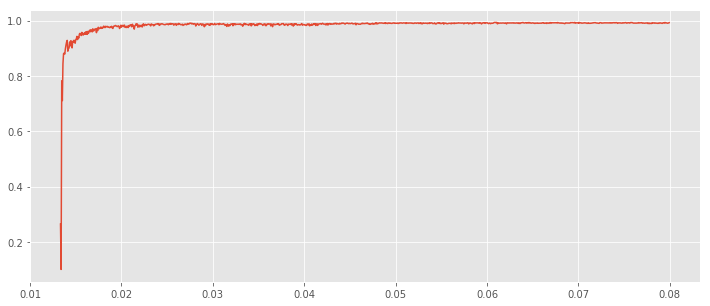

In [15]:
plt.plot(x_axis, score)

In [87]:
score[0]

0.65302971863208947

In [16]:
score[-1]

0.99254405638164589

In [17]:
X_labeled.shape

(60000, 10)

In [61]:
model = RandomForestRegressor(n_estimators=300, n_jobs=-1)
model.fit(X_labeled, y_labeled)
target = model.predict(X_test)

In [62]:
print explained_variance_score(y_test, target)
print mean_squared_error(y_test, target)

0.962614670445
2.85811729428e+94


In [32]:
X_labeled.shape

(60400, 10)

In [38]:
model = GradientBoostingRegressor(n_estimators=100)
model.fit(X_labeled[:713*100], y_labeled[:713*100])
target = model.predict(X)
print explained_variance_score(y, target)
print mean_squared_error(y, target)

0.971826263606
1.23624415748e+94


In [18]:
model = GradientBoostingRegressor(n_estimators=500)
model.fit(X_labeled, y_labeled)
target = model.predict(X)
print explained_variance_score(y, target)
print mean_squared_error(y, target)

0.99599707281
2.35675051011e+93


In [19]:
model = GradientBoostingRegressor(n_estimators=900)
model.fit(X_labeled, y_labeled)
target = model.predict(X_test)
print explained_variance_score(y_test, target)
print mean_squared_error(y_test, target)

0.996325417962
2.12396213892e+93


In [20]:
model = RandomForestRegressor(n_estimators=500, n_jobs=-1)
model.fit(X_labeled, y_labeled)
target = model.predict(X)
print explained_variance_score(y, target)
print mean_squared_error(y, target)

0.99568268648
2.54137551522e+93


In [42]:
df = pd.read_csv("./X_public.csv", index_col='Id')
X = df.values
target = model.predict(X)
index = np.arange(1, target.shape[0]+1).astype(int)
df1 = pd.DataFrame({'Id':index, "target":target})
df1.head()

,Id,target
0,1,1.096922e+45
1,2,2.272743e+45
2,3,-2.198373e+45
3,4,3.369950e+44
4,5,6.188249e+44


In [43]:
df1.to_csv('./result.csv', index=False)